## Regresi Linear sederhana

Regresi Linear (Linear Regresion) adalah sebuah metode yang biasa digunakan untuk memprediksi nilai tertentu yang bersifat kontinu (berkelanjutan).

Misalkan, bisakah kita menghitung berapa nilai suhu `???` dibawah?

```
Celsius | Fahrenheit
--------|-----------
0       | 32
1       | 33.8
2       | 35.6
3       | 37.4
4       | 39.2
5       | ???
```

Tentu saja! karena kita tahu data di atas adalah data konversi dari Celcius ke Fahrenheit, maka untuk menghitung nilai `???` kita tinggal cari rumus konversi suhu dari Celcius ke Fahrenheit, yaitu:

```
°F = (°C × 9/5) + 32
```

Tetapi apabila kita diberikan data dibawah:
```
0       | 32
1       | 33.8
2       | 35.6
3       | 37.4
4       | 39.2
5       | ???
```

Nama dari masing-masing kolom tidak diketahui, dan kita diminta untuk memprediksi nilai `???`. Dalam kasus diatas tetap saja mudah karena kolom pertama mempunyai nilai berurutan maka untuk mengetahui `???` cukup dengan logika dan operasi matematika sederhana.

Namun kita juga bisa menggunakan Regresi Linear untuk memecahkan masalah diatas, meskipun sepertinya "overkill" (terlalu berlebihan) menggunakan deep learning hanya untuk memecahkan persoalan sederhana seperti itu, tetapi ini merupakan kasus sempurna untuk mempraktekkan bagaimana cara membuat model Regresi Linear dengan PyTorch yang bisa kita aplikasikan ke data yang lebih kompleks.

### Import library yang diperlukan

In [1]:
# import library yang dibutuhkan
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

### Membuat dataset

In [2]:
# buat dataset dengan satu fitur dan satu label
# fitur --> suhu Celsius dari -100 sampai 100
# label --> suhu Fahrenheit berdasarkan suhu Celcius diatas dengan rumus: °F = (°C × 9/5) + 32

# kita buat suhunya bertipe: float32
celcius = torch.arange(-100, 100, 1).type(torch.float).unsqueeze(dim=1)
fahrenheit = (celcius * 1.8) + 32

In [3]:
# tampilkan 10 suhu Celcius pertama dan total suhu yang dibuat
celcius[:5], len(celcius)

(tensor([[-100.],
         [ -99.],
         [ -98.],
         [ -97.],
         [ -96.]]),
 200)

In [4]:
# tampilkan 10 suhu Fahrenheit pertama dan total suhu yang dibuat
fahrenheit[:5], len(fahrenheit)

(tensor([[-148.0000],
         [-146.2000],
         [-144.4000],
         [-142.6000],
         [-140.8000]]),
 200)

Text(0, 0.5, 'Fahrenheit')

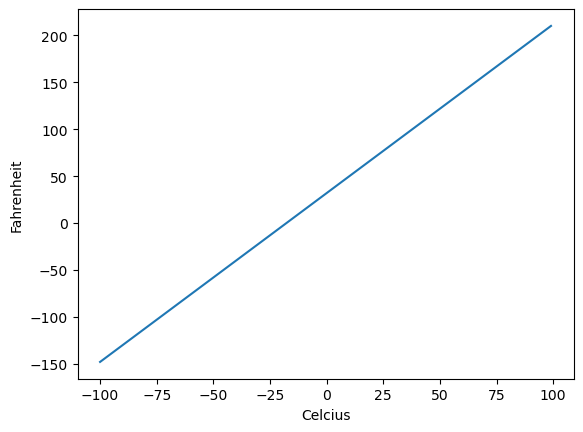

In [5]:
# plot relasi linear antara Celcius and Fahrenheit
plt.plot(celcius, fahrenheit)
plt.xlabel("Celcius")
plt.ylabel("Fahrenheit")

### Bagi dataset menjadi dua, Training dan Test

Kita akan membagi dataset suhu diatas (fitur dan label) masing-masing menjadi dua `80%` dan `20%` sehingga menjadi:

- 80% fitur training (`X_train`)
- 20% fitur test (`X_test`)
- 80% label training (`y_train`)
- 20% label test (`y_test`)

In [6]:
# kita gunakan fungsi: train_test_split() dari sklearn untuk mempermudah proses ini.
X_train, X_test, y_train, y_test = train_test_split(celcius, fahrenheit, test_size=0.2, random_state=42)

In [7]:
# fungsi train_test_split() juga mengacak data kita
X_train[:10]

tensor([[-21.],
        [ 97.],
        [-62.],
        [-76.],
        [ 22.],
        [ 95.],
        [-71.],
        [-81.],
        [ 43.],
        [-14.]])

### Membuat Model dengan PyTorch

In [8]:
# kita buat class-based PyTorch model sederhana:
# hanya punya satu layer Linear dengan 1 input dan 1 output
# artinya: 1 input Celcius dan berusaha memprediksi 1 output Fahrenheit

class Model(nn.Module):
    """
    Sebenarnya untuk soal sederhana seperti ini kita tidak perlu membuat model
    dengan class, cukup dengan:
    
    ```
    model = nn.Linear(in_features=1, out_features=1)
    ```
    
    **ini hanya untuk membiasakan diri dengan class based model**
    """
    def __init__(self):
        super().__init__()
        
        # model dengan satu linear layer
        self.layer1 = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x):
        return self.layer1(x)

In [9]:
# -- Buat model, loss function dan optimizer
torch.manual_seed(42)

# inisiasi model
model = Model()

# Loss function dan Optimizer
loss_fn = nn.L1Loss() # MAE (Mean Absolute Error)
optim = torch.optim.Adam(model.parameters(), lr=0.1) # Adam dengan learning rate=0.1

# Buat training loop
epochs = 500 # training 500x
losses = []  # untuk memvisualisasikan loss

# -- Training loop
for i in range(epochs):
    model.train() # set train mode
    
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    
    losses.append(loss.item())
    
    # kita hanya akan print 10 loss terakhir
    if i >= 490:
        print(f"epoch={i+1}, loss={loss.item()}")
    
    # backward propagation
    optim.zero_grad()
    loss.backward()
    optim.step()

epoch=491, loss=0.19739475846290588
epoch=492, loss=0.20260150730609894
epoch=493, loss=0.19677555561065674
epoch=494, loss=0.20199385285377502
epoch=495, loss=0.1961711049079895
epoch=496, loss=0.20139411091804504
epoch=497, loss=0.19557277858257294
epoch=498, loss=0.20080681145191193
epoch=499, loss=0.1949874311685562
epoch=500, loss=0.20022618770599365


Text(0, 0.5, 'loss')

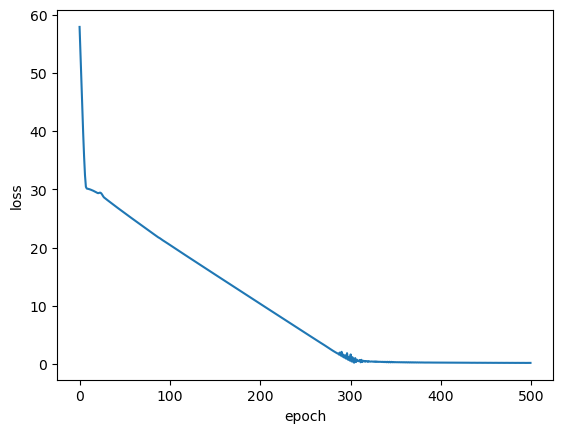

In [10]:
# Visualisasikan loss
plt.plot(range(epochs), losses)
plt.xlabel("epoch")
plt.ylabel("loss")

Pada plot diatas, **training ke 300 sampai 500 nilai loss sudah paling rendah dan stabil** jadi kita bisa pakai jumlah epochs di antara nilai tersebut.

In [11]:
# Hitung loss pada test data
model.eval()

with torch.inference_mode():
    y_pred = model(X_test)
    loss = loss_fn(y_pred, y_test)
    
    print(f"Loss pada test data: {loss.item()}")

Loss pada test data: 0.17115922272205353


👍 Tenyata lossnya cukup bagus **0.17**, artinya apabila kita memprediksi suhu Fahrenheit dari Celcius ada kemungkinan kesalahan 0.17 derajat, **cukup akurat**.

Sekarang mari kita gunakan model untuk memprediksi suhu: 

In [12]:
with torch.inference_mode():
    print(f"C=0, F={model(torch.FloatTensor([0])).item()}")
    print(f"C=10, F={model(torch.FloatTensor([10])).item()}")
    print(f"C=15, F={model(torch.FloatTensor([15])).item()}")
    print(f"C=30, F={model(torch.FloatTensor([30])).item()}")
    print(f"C=100, F={model(torch.FloatTensor([100])).item()}")

C=0, F=31.999980926513672
C=10, F=49.96202850341797
C=15, F=58.94305419921875
C=30, F=85.88612365722656
C=100, F=211.62046813964844


Bandingkan dengan hasil yang menggunakan formula `°F = (°C × 9/5) + 32`:

```
Celsius | Fahrenheit (formula) | Fahrenheit (prediksi model)
--------|----------------------|----------------------------
0       | 32                   | 31.99
10      | 50                   | 49.96
15      | 59                   | 58.94
30      | 86                   | 85.88
100     | 212                  | 211.62
```

**Hasilnya cukup akurat!**

Tentu saja untuk kasus diatas tidak perlu menggunakan Deep Learning karena kita sudah tahu formula sebenarnya. ML secara umum berfungsi untuk mencari formula/hubungan/relasi antara input dan output sehingga bisa digunakan untuk memprediksi value baru di masa depan.